In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk,pprint
from nltk import pos_tag
from nltk.tokenize import casual_tokenize, word_tokenize, MWETokenizer, sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.probability import FreqDist


## Task 1

In [2]:
# Task 1. Reading the .txt file.

with open('class_11_biology_chapter_1_0.txt') as f:
    text = f.read().lower()
    print(text)
    print(len(text))

chapter 1
the living world

chapter 2
biological classification

chapter 3
plant kingdom

chapter 4
animal kingdom

 

unit i

diversity in the living world

biology is the science of life forms and living processes. the living world
comprises an amazing diversity of living organisms. early man could
easily perceive the difference between inanimate matter and living
organisms. early man deified some of the inanimate matter (wind, sea,
fire etc.) and some among the animals and plants. a common feature of
all such forms of inanimate and animate objects was the sense of awe
or fear that they evoked. the description of living organisms including
human beings began much later in human history. societies which
indulged in anthropocentric view of biology could register limited
progress in biological knowledge. systematic and monumental
description of life forms brought in, out of necessity, detailed systems
of identification, nomenclature and classification. the biggest spin off
of such studi

## Task 2

In [3]:
# Task 2. Obtain the file metadata.

sent_sentences = sent_tokenize(text)
sent_sentences_u = len(set(sent_tokenize(text)))
word_tokens = word_tokenize(text)
word_tokens_u = len(set(word_tokenize(text)))
casual_tokens = casual_tokenize(text)
casual_tokens_u = len(set(casual_tokenize(text)))
mwe_tokenizer = MWETokenizer()
mw_tokens = mwe_tokenizer.tokenize(text.split())
mw_len_u = len(set(mw_tokens))
union = set()
union.update(word_tokens, casual_tokens, mw_tokens)
print(f'''The number of sentences extracted by sent_tokenize is {sent_sentences_u}  \n
The number of unique tokens obtained with: \n
word_tokenize  {word_tokens_u}\n
casual_tokenize  {casual_tokens_u} \n
MWETokenizer  {mw_len_u}.\n''')

The number of sentences extracted by sent_tokenize is 13  

The number of unique tokens obtained with: 

word_tokenize  134

casual_tokenize  134 

MWETokenizer  135.



In [4]:
# The mean number of words (tokens) per sentence in the text by every tokenizer.

def get_mean_tokens(sentences, tokenazer):
    summi = 0
    for sent in sentences:
        summi+= len(tokenazer(sent))
    return summi / len(sentences) 

w = get_mean_tokens(sent_sentences,word_tokenize)
c = get_mean_tokens(sent_sentences,casual_tokenize)
m = get_mean_tokens(sent_sentences,mwe_tokenizer.tokenize)
print(f'''The mean number of words (tokens) per sentence in the text by: \n
        word tokenize: {w} \n
        casual tokenize: {c} \n
        mwe tokeniizer: {m}''')

The mean number of words (tokens) per sentence in the text by: 

        word tokenize: 19.46153846153846 

        casual tokenize: 19.46153846153846 

        mwe tokeniizer: 113.61538461538461


## Task 3

In [5]:
# Task 3. Comparing the Stemmers.

p_stemmer = PorterStemmer()
p_stemed = [p_stemmer.stem(i) for i in union]
l_steamer = LancasterStemmer()
l_stemed = [l_steamer.stem(i) for i in union]
s_steamer = SnowballStemmer(language='english')
s_stemed = [s_steamer.stem(i) for i in union]

d = {'Original_Token': list(union), 'Porter': p_stemed, 'Lancaster': l_stemed, 'Snowball': s_stemed}
df = pd.DataFrame(data=d)
df[:20]

,Original_Token,Porter,Lancaster,Snowball
0,taxonomist’s,taxonomist’,taxonomist’s,taxonomist
1,matter,matter,mat,matter
2,human,human,hum,human
3,view,view,view,view
4,is,is,is,is
5,2019-2020,2019-2020,2019-2020,2019-2020
6,you,you,you,you
7,awe,awe,aw,awe
8,nomenclature,nomenclatur,nomenc,nomenclatur
9,animate,anim,anim,anim


## Task 4

10 most frequent tokens 
 [('of', 17), ('the', 13), ('and', 11), ('living', 9), ('in', 5), ('chapter', 4), ('a', 4), ('organisms', 4), ('world', 3), ('forms', 3)]
                                                  
 List of Hapaxes 
 ['taxonomist’s', 'matter', 'human', 'view', 'is', '2019-2020', 'you', 'awe', 'nomenclature', 'animate', 'revelation', 'taxonomist', 'biology', 'such', 'objects', 'perspective', 'description,', 'ever', 'biodiversity', 'societies', ',', 'detailed', 'led', 'on', 'all', 'processes.', 'plants.', 'world', 'science', 'sea,', 'among', 'register', 'perspective.', 'forms', 'evoked.', '’', 'a', 's', 'horizontally', 'chapters', 'each', 'common', 'to', '.', 'which', 'classification,', 'both', 'history.', 'and', 'unit', 'they', 'following', 'systematic', 'deified', 'feature', 'necessity', 'humbled', 'brought', 'processes', 'the', 'fear', 'i', 'necessity,', 'knowledge', 'diversity', 'that', 'man', '(wind,', 'similarities', 'for', 'systems', '4', 'plants', 'conservation', 

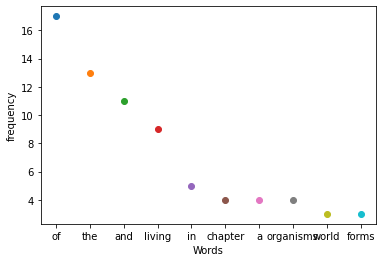

In [8]:
# Task 4. Frequencies of words.

# 10 most frequent tokens
most_freq = Counter(text.split())
most_freq = most_freq.most_common(10)

# Extract the list of the hapaxes.
list_of_hapaxes = FreqDist(union).hapaxes()

# Plot the frequency of the words in the descending order as a scatter plot, 
for i, j in most_freq:
    plt.scatter(x=i,y=j)
    plt.xlabel('Words')
    plt.ylabel('frequency')
print(f'10 most frequent tokens \n {most_freq}\n \
                                                 \n \
List of Hapaxes \n \
{list_of_hapaxes}')    

## Task 5

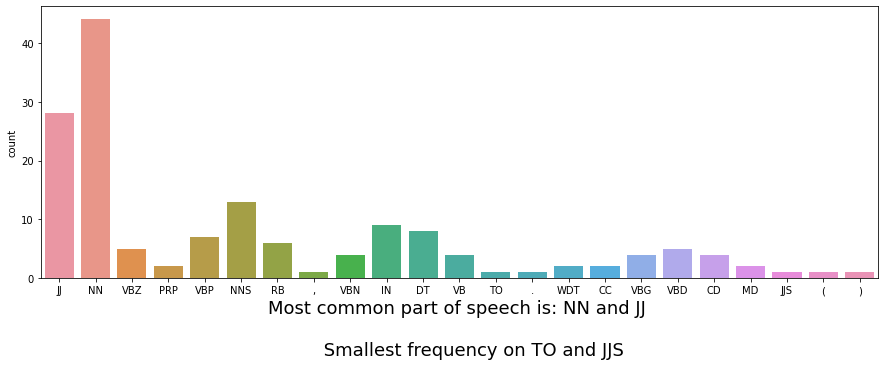

In [17]:
# Task 5. Part of speech tagging.
Part_of_speech = nltk.pos_tag(union)

# Group part of speech them in dictionary 
p_o_s_dict = {}
for pair in Part_of_speech :
    key = pair[1]
    value = pair[0]
    if key in p_o_s_dict:
      p_o_s_dict[key].append(value)
    else:
      p_o_s_dict[key] = [value]

df = pd.DataFrame(Part_of_speech )
plt.figure(figsize=(15,5))
sns.countplot(x=df[1])
plt.xlabel('''Most common part of speech is: NN and JJ \n
     Smallest frequency on TO and JJS''',fontsize=18);

In [12]:
Part_of_speech 

[('taxonomist’s', 'JJ'),
 ('matter', 'NN'),
 ('human', 'JJ'),
 ('view', 'NN'),
 ('is', 'VBZ'),
 ('2019-2020', 'JJ'),
 ('you', 'PRP'),
 ('awe', 'VBP'),
 ('nomenclature', 'JJ'),
 ('animate', 'JJ'),
 ('revelation', 'NN'),
 ('taxonomist', 'NN'),
 ('biology', 'NN'),
 ('such', 'JJ'),
 ('objects', 'NNS'),
 ('perspective', 'VBP'),
 ('description,', 'NN'),
 ('ever', 'RB'),
 ('biodiversity', 'NN'),
 ('societies', 'NNS'),
 (',', ','),
 ('detailed', 'VBN'),
 ('led', 'VBN'),
 ('on', 'IN'),
 ('all', 'DT'),
 ('processes.', 'NN'),
 ('plants.', 'NN'),
 ('world', 'NN'),
 ('science', 'NN'),
 ('sea,', 'NN'),
 ('among', 'IN'),
 ('register', 'JJ'),
 ('perspective.', 'NN'),
 ('forms', 'NNS'),
 ('evoked.', 'VBP'),
 ('’', 'VB'),
 ('a', 'DT'),
 ('s', 'NN'),
 ('horizontally', 'RB'),
 ('chapters', 'VBZ'),
 ('each', 'DT'),
 ('common', 'JJ'),
 ('to', 'TO'),
 ('.', '.'),
 ('which', 'WDT'),
 ('classification,', 'VBP'),
 ('both', 'DT'),
 ('history.', 'NNS'),
 ('and', 'CC'),
 ('unit', 'NN'),
 ('they', 'PRP'),
 ('follow

In [13]:
pprint.pprint(p_o_s_dict)

{'(': ['('],
 ')': [')'],
 ',': [','],
 '.': ['.'],
 'CC': ['and', 'or'],
 'CD': ['4', '2', '3', '1'],
 'DT': ['all', 'a', 'each', 'both', 'the', 'some', 'an', 'this'],
 'IN': ['on', 'among', 'for', 'from', 'in', 'between', 'of', 'out', 'off'],
 'JJ': ['taxonomist’s',
        'human',
        '2019-2020',
        'nomenclature',
        'animate',
        'such',
        'register',
        'common',
        'systematic',
        'deified',
        'brought',
        'i',
        'vertically.',
        'related',
        'monumental',
        'much',
        'early',
        'limited',
        'perceive',
        'unit,',
        'biological',
        'other',
        'progress',
        'identification,',
        'present',
        'organisms.',
        'description',
        'cultural'],
 'JJS': ['biggest'],
 'MD': ['could', 'will'],
 'NN': ['matter',
        'view',
        'revelation',
        'taxonomist',
        'biology',
        'description,',
        'biodiversity',
       